In [1]:
#from this: https://jessesw.com/XG-Boost/

In [2]:
import numpy as np
import pandas as pd

In [8]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

In [10]:
train_set = pd.read_csv('adult.data', names=col_labels)
test_set = pd.read_csv('adult.test', names=col_labels,
                      skiprows = 1) # Make sure to skip a row for the test set

In [11]:
train_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
test_set.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [15]:
train_set.replace(' ?', np.nan).dropna(inplace=True)
test_set.replace(' ?', np.nan).dropna(inplace=True)

In [16]:
test_set['wage_class'] = test_set['wage_class'].replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [17]:
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
test_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
#ordinal encoding is fine for trees, only need to do one-hot encoding for linear models

In [20]:
combined_set = pd.concat([train_set, test_set], axis = 0)

In [21]:
for feature in combined_set.columns: 
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [22]:
final_train = combined_set[:train_set.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_set.shape[0]:] # Past the last initial training set row

In [23]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [25]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [26]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 
              'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [27]:
#gridsearchCV exhaustively generates candidates from parameter values

In [28]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [30]:
GridSearchCV(cv=5, error_score='raise',
       estimator=xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [31]:
optimized_GBM.grid_scores_

[mean: 0.87089, std: 0.00191, params: {'min_child_weight': 1, 'max_depth': 3},
 mean: 0.87055, std: 0.00259, params: {'min_child_weight': 3, 'max_depth': 3},
 mean: 0.87027, std: 0.00317, params: {'min_child_weight': 5, 'max_depth': 3},
 mean: 0.86576, std: 0.00182, params: {'min_child_weight': 1, 'max_depth': 5},
 mean: 0.86542, std: 0.00126, params: {'min_child_weight': 3, 'max_depth': 5},
 mean: 0.86588, std: 0.00260, params: {'min_child_weight': 5, 'max_depth': 5},
 mean: 0.85971, std: 0.00370, params: {'min_child_weight': 1, 'max_depth': 7},
 mean: 0.86063, std: 0.00290, params: {'min_child_weight': 3, 'max_depth': 7},
 mean: 0.86091, std: 0.00282, params: {'min_child_weight': 5, 'max_depth': 7}]

In [32]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [33]:
optimized_GBM.grid_scores_ #this is actually worse!

[mean: 0.86997, std: 0.00301, params: {'subsample': 0.7, 'learning_rate': 0.1},
 mean: 0.87089, std: 0.00191, params: {'subsample': 0.8, 'learning_rate': 0.1},
 mean: 0.87123, std: 0.00270, params: {'subsample': 0.9, 'learning_rate': 0.1},
 mean: 0.86441, std: 0.00298, params: {'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.86410, std: 0.00231, params: {'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.86404, std: 0.00299, params: {'subsample': 0.9, 'learning_rate': 0.01}]

In [34]:
#early stopping & improve performance by sorting first

In [35]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [39]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

Will train until cv error hasn't decreased in 100 rounds.
/Users/szeitlin/anaconda/envs/ensembles/lib/python3.5/site-packages/xgboost/training.py:272: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  idset = [randidx[(i * kstep): min(len(randidx), (i + 1) * kstep)] for i in range(nfold)]
Stopping. Best iteration: 180


In [40]:
cv_xgb.tail()

,test-error-mean,test-error-std,train-error-mean,train-error-std
176,0.127300,0.004741,0.112389,0.001977
177,0.127115,0.004886,0.112251,0.001918
178,0.127238,0.004700,0.112144,0.001891
179,0.127207,0.004536,0.111913,0.001776
180,0.126870,0.004474,0.111736,0.001695


In [38]:
#with bigger max_depth and child_weight, this did better

In [41]:
final_gb = xgb.train(our_params, xgdmat, num_boost_round=180)

In [43]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

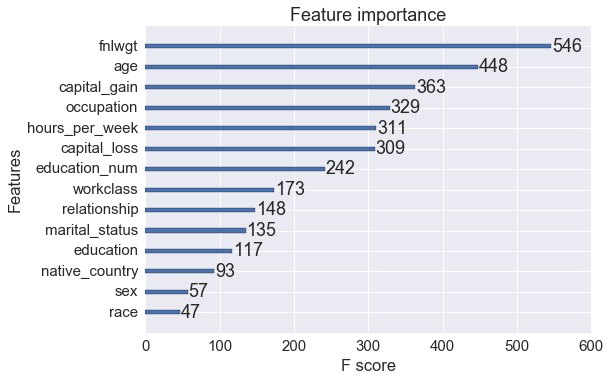

In [44]:
xgb.plot_importance(final_gb) #interesting, some of these came out differently than his

In [45]:
importances = final_gb.get_fscore()
importances

{'age': 448,
 'capital_gain': 363,
 'capital_loss': 309,
 'education': 117,
 'education_num': 242,
 'fnlwgt': 546,
 'hours_per_week': 311,
 'marital_status': 135,
 'native_country': 93,
 'occupation': 329,
 'race': 47,
 'relationship': 148,
 'sex': 57,
 'workclass': 173}

In [46]:
testdmat = xgb.DMatrix(final_test)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred #this outputs probabilities, not class labels

array([ 0.00228414,  0.21682005,  0.31682825, ...,  0.80403745,
        0.12014179,  0.77593178], dtype=float32)

In [48]:
#convert to class labels
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

In [49]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.87377925188870464, 0.12622074811129536)